In [ ]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt

from keras.models import Sequential
from keras.layers import Dense, Dropout
from keras import regularizers


In [ ]:
data = pd.read_csv('/content/hour.csv')
ohe_feature = ['season','weathersit','mnth','hr','weekday']
for feature in ohe_feature:
  dummies = pd.get_dummies(data[feature],prefix = feature,drop_first = False)
  data = pd.concat([data,dummies],axis = 1)

drop_feature = ['instant','dteday','season','weathersit','mnth','hr','weekday','atemp','workingday','casual','registered']
data.drop(drop_feature,axis = 1)

,yr,holiday,temp,hum,windspeed,cnt,season_1,season_2,season_3,season_4,weathersit_1,weathersit_2,weathersit_3,weathersit_4,mnth_1,mnth_2,mnth_3,mnth_4,mnth_5,mnth_6,mnth_7,mnth_8,mnth_9,mnth_10,mnth_11,mnth_12,hr_0,hr_1,hr_2,hr_3,hr_4,hr_5,hr_6,hr_7,hr_8,hr_9,hr_10,hr_11,hr_12,hr_13,hr_14,hr_15,hr_16,hr_17,hr_18,hr_19,hr_20,hr_21,hr_22,hr_23,weekday_0,weekday_1,weekday_2,weekday_3,weekday_4,weekday_5,weekday_6
0,0,0,0.24,0.81,0.0000,16,True,False,False,False,True,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True
1,0,0,0.22,0.80,0.0000,40,True,False,False,False,True,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True
2,0,0,0.22,0.80,0.0000,32,True,False,False,False,True,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True
3,0,0,0.24,0.75,0.0000,13,True,False,False,False,True,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True
4,0,0,0.24,0.75,0.0000,1,True,False,False,False,True,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
17374,1,0,0.26,0.60,0.1642,119,True,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,True,False,False,False,False,False
17375,1,0,0.26,0.60,0.1642,89,True,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,True,False,False,False,False,False
17376,1,0,0.26,0.60,0.1642,90,True,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,True,False,False,False,False,False
17377,1,0,0.26,0.56,0.1343,61,True,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,True,False,False,False,False,False


In [ ]:
norm_features = ['cnt','temp','hum','windspeed']
scaled_features = {}
for feature in norm_features:
  mean,std = data[feature].mean(),data[feature].std()
  scaled_features[feature] = [mean,std]
  data.loc[:,feature] = (data[feature] - mean)/std

<ipython-input-5-546fafd27234>:6: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value '[-0.95631172 -0.82399838 -0.86810283 ... -0.54834558 -0.7082242
 -0.77438087]' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  data.loc[:,feature] = (data[feature] - mean)/std


In [ ]:
test_data = data[-31*24:]
data = data[:-31*24]
target_fields = ['cnt']
features, targets = data.drop(target_fields,axis=1),data[target_fields]
test_features, test_targets = test_data.drop(target_fields,axis=1),test_data[target_fields]

X_train,y_train = features[:-30*24],targets[:-30*24]
X_val,y_val = features[-30*24:],targets[-30*24:]

In [ ]:
model = Sequential()
model.add(Dense(250,input_dim=X_train.shape[1],activation = 'relu'))
model.add(Dense(150,activation='relu'))
model.add(Dense(25,activation='relu'))
model.add(Dense(15,activation='relu'))
model.add(Dense(1,activation='linear'))

/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [ ]:
model.compile(loss='mse',optimizer='sgd',metrics=['mae'])

In [ ]:
n_epochs = 500
batch_size = 50

In [ ]:
history = model.fit(X_train,y_train['cnt'],
                    validation_data = (X_val,y_val['cnt']),
                    batch_size = batch_size,epochs = n_epochs,verbose=0)

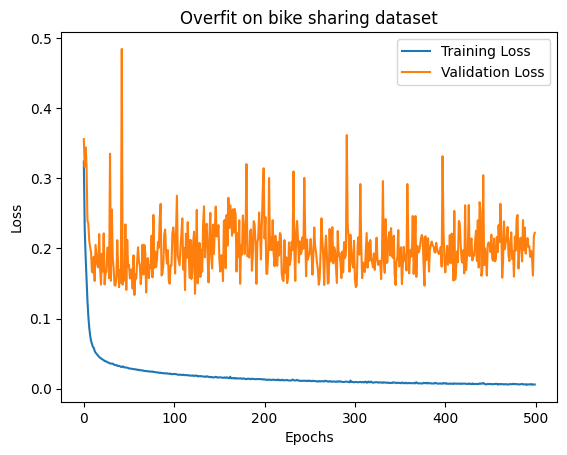

In [ ]:
plt.plot(np.arange(len(history.history['loss'])),history.history['loss'],label='Training Loss')
plt.plot(np.arange(len(history.history['val_loss'])),history.history['val_loss'],label='Validation Loss')
plt.title('Overfit on bike sharing dataset')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend(loc=0)
plt.show()

In [ ]:
print('Minimum Loss: ',min(history.history['val_loss']),'\nAfter',np.argmin(history.history['val_loss']),'epochs')

print('Minimum Loss: ',min(history.history['val_loss']),'\nAfter',np.argmin(history.history['val_loss']),'epochs')

model_reg = Sequential()
model_reg.add(Dense(250,input_dim=X_train.shape[1],activation = 'relu',
                    kernel_regularizer = regularizers.l2(0.005)))
model_reg.add(Dense(150,activation='relu'))
model_reg.add(Dense(50,activation='relu'))
model_reg.add(Dense(25,activation='relu',kernel_regularizer =  regularizers.l2(0.005)))
model_reg.add(Dense(15,activation
                    ='relu'))
model_reg.add(Dense(1,activation='linear'))

print('Minimum Loss: ',min(history.history['val_loss']),'\nAfter',np.argmin(history.history['val_loss']),'epochs')

print('Minimum Loss: ',min(history.history['val_loss']),'\nAfter',np.argmin(history.history['val_loss']),'epochs')

model_reg = Sequential()
model_reg.add(Dense(250,input_dim=X_train.shape[1],activation = 'relu',
                    kernel_regularizer = regularizers.l2(0.005)))
model_reg.add(Dense(150,activation='relu'))
model_reg.add(Dense(50,activation='relu'))
model_reg.add(Dense(25,activation='relu',kernel_regularizer =  regularizers.l2(0.005)))
model_reg.add(Dense(15,activation='relu'))
model_reg.add(Dense(1,activation='linear'))


model_reg.compile(loss='mse',optimizer='sgd',metrics=['mse'])
#model_reg.add(Dense(25,activation='relu',kernel_regularizer =  regularizers.12(0.005))) #Error: NameError: name 'regularizers' is not defined.  This line and the next two lines were removed.
#model_reg.add(Dense(15,activation='relu'))
#model_reg.add(Dense(1,activation='linear'))


#model_reg.compile(loss='mse',optimizer='sgd',metrics=['mse']) #Duplicate compile




model_reg.compile(loss='mse',optimizer='sgd',metrics=['mse'])


Minimum Loss:  0.13365542888641357 
After 56 epochs
Minimum Loss:  0.13365542888641357 
After 56 epochs
Minimum Loss:  0.13365542888641357 
After 56 epochs
Minimum Loss:  0.13365542888641357 
After 56 epochs


/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [ ]:
history_reg = model_reg.fit(X_train,y_train['cnt'],
                    validation_data = (X_val,y_val['cnt']),
                    batch_size = batch_size,epochs = n_epochs,verbose=0)

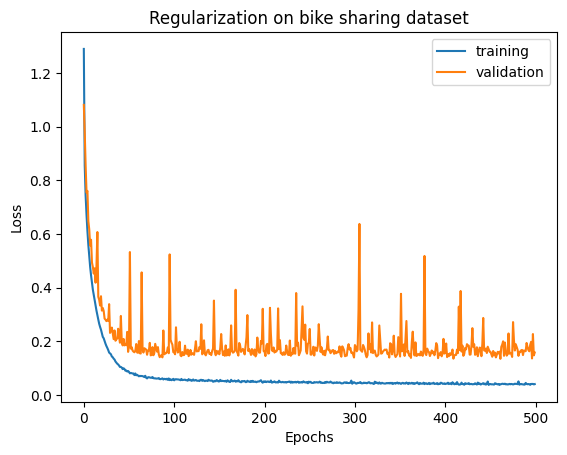

In [ ]:
plt.plot(np.arange(len(history_reg.history['loss'])),history_reg.history['loss'],label='training')
plt.plot(np.arange(len(history_reg.history['val_loss'])),history_reg.history['val_loss'],label='validation')
plt.title('Regularization on bike sharing dataset')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend(loc=0)
plt.show()

In [ ]:
print('Minimum Loss: ',min(history_reg.history['val_loss']),
      '\nAfter',np.argmin(history_reg.history['val_loss']),
      'epochs')



Minimum Loss:  0.13455958664417267 
After 461 epochs
